In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode='binary')                                                 

Found 20000 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode='binary')     

Found 5000 images belonging to 2 classes.


In [10]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [11]:
from tensorflow.keras.regularizers import l2

In [15]:
cnn = tf.keras.models.Sequential()

# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='linear'))

In [16]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,545 (1.04 MB)

 Trainable params: 272,545 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [18]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 192ms/step - accuracy: 0.5724 - loss: 0.9092 - val_accuracy: 0.7138 - val_loss: 0.7017
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 147ms/step - accuracy: 0.6917 - loss: 0.6602 - val_accuracy: 0.7440 - val_loss: 0.5706
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 159ms/step - accuracy: 0.7281 - loss: 0.5849 - val_accuracy: 0.7718 - val_loss: 0.5586
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.7467 - loss: 0.5530 - val_accuracy: 0.7840 - val_loss: 0.5080
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 156ms/step - accuracy: 0.7529 - loss: 0.5283 - val_accuracy: 0.7838 - val_loss: 0.4769
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 142ms/step - accuracy: 0.7655 - loss: 0.5063 - val_accuracy: 0.7740 - val_loss: 0.4779
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.7727 - loss: 0.4934 - val_accuracy: 0.8006 - val_loss: 0.4887
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 137ms/step - accuracy: 0.7802 - loss:

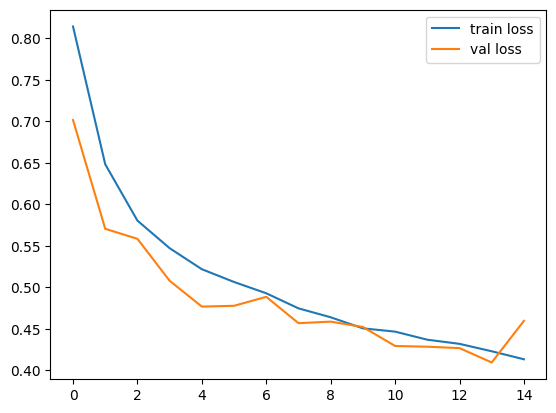

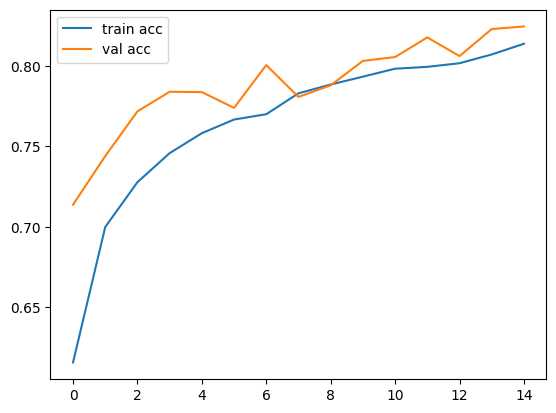

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
cnn.save('model_rcat_dog.h5')

In [21]:
from tensorflow.keras.models import load_model
 
model = load_model('model_rcat_dog.h5')

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Datasets/test/dogs/dog.4015.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The image classified is dog


In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Datasets/test/cats/cat.10.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The image classified is cat
